<a href="https://colab.research.google.com/github/EmreYklm/MIS515_SDSU/blob/main/MIS_515_Kaggle_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# For Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For Visualizing Decision Trees
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

In [ ]:
# Loading the dataset

data = pd.read_csv('Credit_Score.csv')
print(data.head())

   Age  Gender  Income            Education Marital Status  \
0   25  Female   50000    Bachelor's Degree         Single   
1   30    Male  100000      Master's Degree        Married   
2   35  Female   75000            Doctorate        Married   
3   40    Male  125000  High School Diploma         Single   
4   45  Female  100000    Bachelor's Degree        Married   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High  


In [ ]:
# Checking for missing values in the dataset

print(data.shape)
data.isnull().sum()

(164, 8)


Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [ ]:
# Encode categorical variables
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Education'] = le.fit_transform(data['Education'])
data['Marital Status'] = le.fit_transform(data['Marital Status'])
data['Home Ownership'] = le.fit_transform(data['Home Ownership'])
data['Credit Score'] = le.fit_transform(data['Credit Score'])

In [ ]:
# Define features (X) and target variable (y)
X = data.drop('Credit Score', axis=1)
y = data['Credit Score']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train a Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.96      1.00      0.98        23
           2       1.00      1.00      1.00         5

    accuracy                           0.97        33
   macro avg       0.99      0.93      0.96        33
weighted avg       0.97      0.97      0.97        33



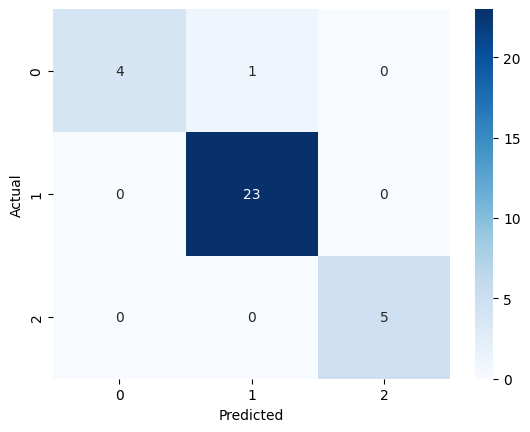

In [ ]:
# Display classification report and confusion matrix
print('Classification Report:\n', classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

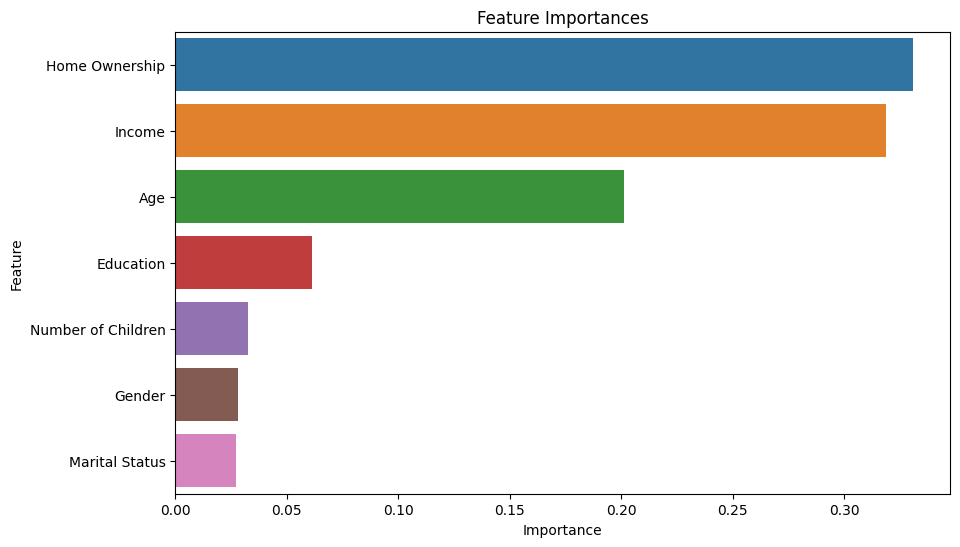

In [ ]:
# Feature Importance

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': final_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


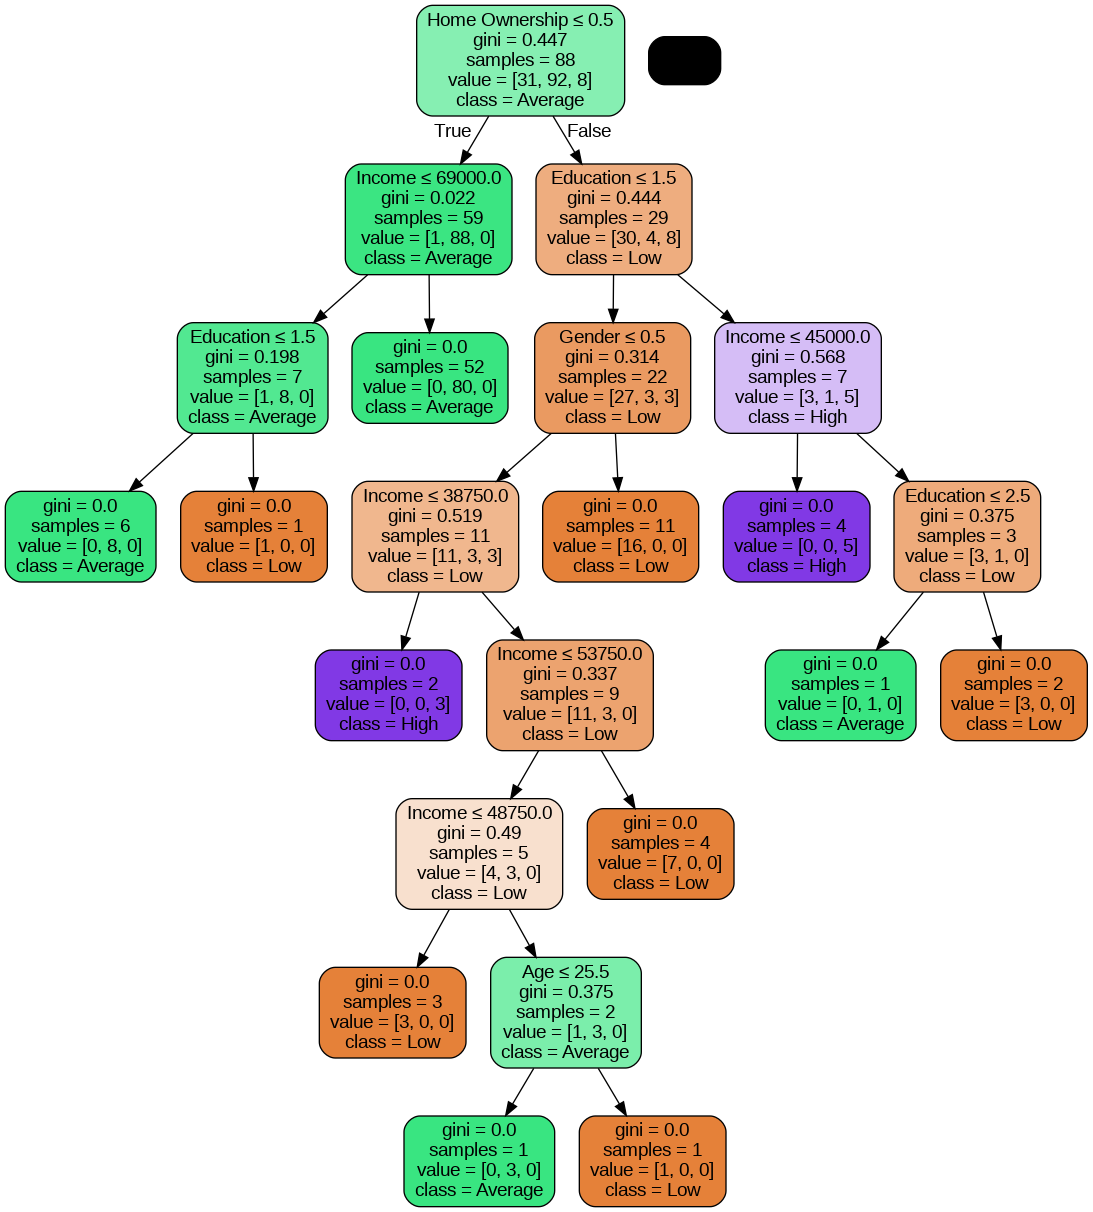

In [ ]:
# Decision Trees

# Choose one tree from the forest
tree = final_model.estimators_[0]

# Export the tree to a DOT file
dot_data = export_graphviz(tree, out_file=None,
                           feature_names=X.columns,
                           class_names=['Low', 'Average', 'High'],
                           filled=True, rounded=True, special_characters=True)

# Create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph
Image(graph.create_png())
